# 6.2 Exploring relationships 

1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path= r'C:\Users\beaac\Desktop\Chocolate Bars'

In [5]:
#Importing cleaning data 
df_clean= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Flavors_Of_Cacao_cleaned.csv'), index_col = False)

In [7]:
df_clean.dtypes

Unnamed: 0                     int64
Company  (Maker-if known)     object
Bar_Name                      object
REF                            int64
Review_Date                    int64
Cocoa_Percent                float64
Location                      object
Rating                       float64
Bean_Type                     object
Bean_Origin                   object
Multi_Origin                  object
Primary_Origin                object
dtype: object

In [9]:
df_clean.head()

,Unnamed: 0,Company (Maker-if known),Bar_Name,REF,Review_Date,Cocoa_Percent,Location,Rating,Bean_Type,Bean_Origin,Multi_Origin,Primary_Origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome,False,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo,False,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo,False,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo,False,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru,False,Peru


In [11]:
df_clean.columns = df_clean.columns.str.strip().str.replace('\xa0', ' ').str.replace('  ', ' ')
df_clean.rename(columns={'Company (Maker-if known)': 'Company'}, inplace=True)


In [13]:
df_clean.columns

Index(['Unnamed: 0', 'Company', 'Bar_Name', 'REF', 'Review_Date',
       'Cocoa_Percent', 'Location', 'Rating', 'Bean_Type', 'Bean_Origin',
       'Multi_Origin', 'Primary_Origin'],
      dtype='object')

2. Create a correlation heatmap using seaborn:

In [26]:
 #Create a copy to work from
sub_clean = df_clean.copy()

In [28]:

# drop non- informative or text-heavy columns
sub_clean = df_clean.drop(columns=[
    'Unnamed: 0', 
    'Company', 
    'Bar_Name', 
    'REF', 
    'Review_Date'
])


In [30]:
# Encode categorical features
for col in ['Location', 'Bean_Type', 'Bean_Origin']:
    sub_clean[col] = sub_clean[col].astype('category').cat.codes


In [34]:
# Now select only the numeric columns to prep for correlation
numeric_sub_clean = sub_clean.select_dtypes(include=['int64', 'float64', 'int8'])

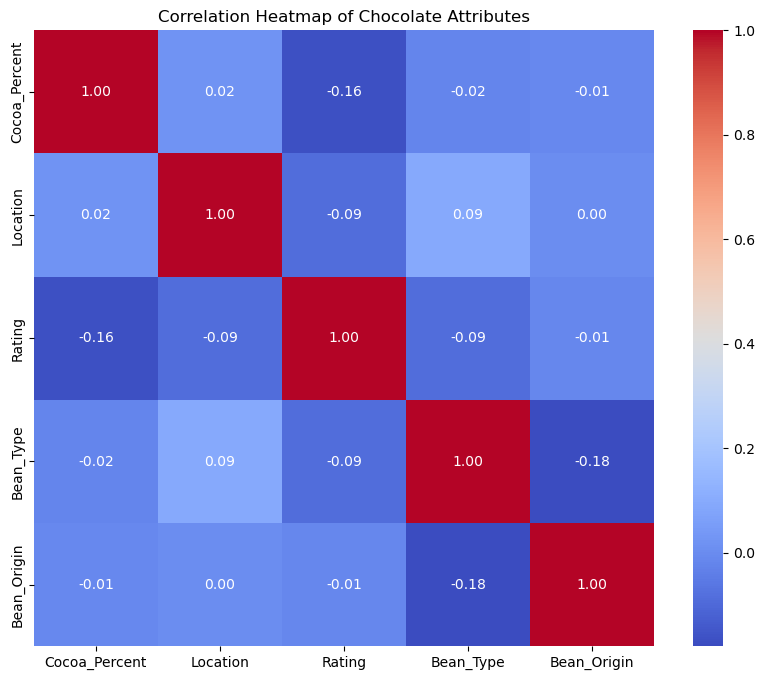

In [38]:

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_sub_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Chocolate Attributes')
plt.savefig(r'C:\Users\beaac\Desktop\Chocolate Bars\04 Analysis\Visualizations\Correlation_Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


The heatmap shows how different features in the chocolate dataset relate to each other. A negative correlation means that as a one value increase, the other tends to decrease slightly. Like how higher cocoa percentages are weakly associated with lower ratings.

3. Create a scatterplot for Cococa_percent vs Rating 

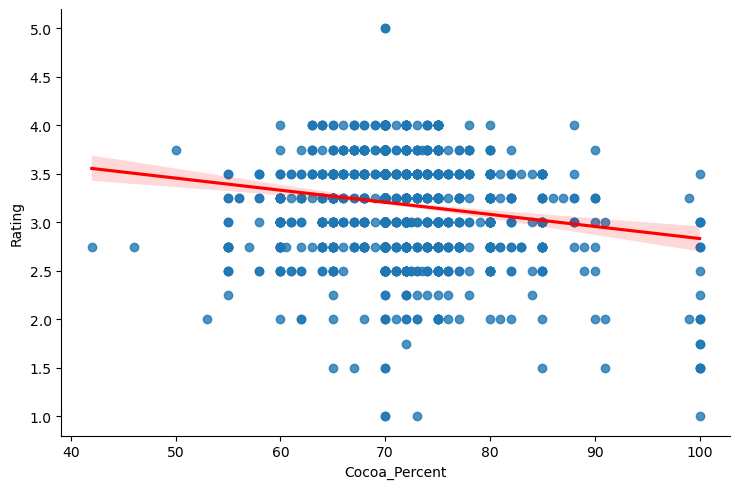

In [48]:
# Create scatterplot in seaborn
g=sns.lmplot(data=numeric_sub_clean, x='Cocoa_Percent', y='Rating', aspect=1.5, line_kws={'color': 'red'})
g.savefig(r"C:\Users\beaac\Desktop\Chocolate Bars\04 Analysis\Visualizations\lmplot_cocoa_vs_rating.png", dpi=300, bbox_inches='tight')

As the cocoa percentage increases, ratings tend to dip slightly.

4. Create Pair Plot of the entire data

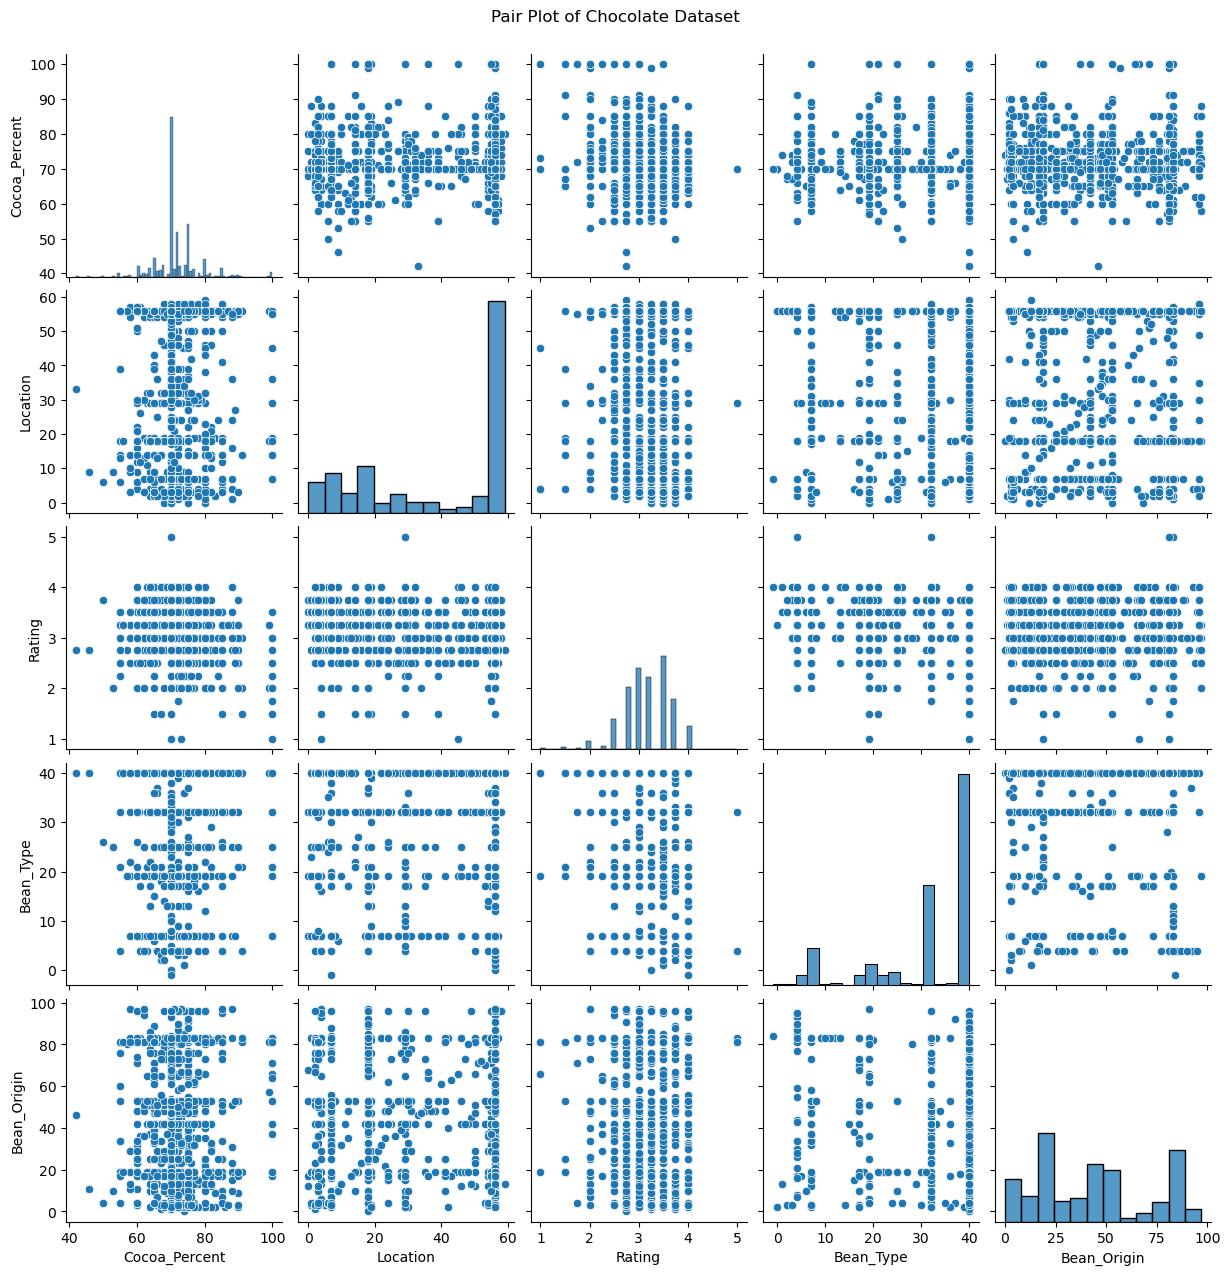

In [50]:
# Create a copy to ensure encoded variables only affect visualization
pair_df = numeric_sub_clean.copy()

# Generate the pair plot
g1=sns.pairplot(pair_df)
plt.suptitle('Pair Plot of Chocolate Dataset', y=1.02)
g1.fig.savefig(r"C:\Users\beaac\Desktop\Chocolate Bars\04 Analysis\Visualizations\pairplot_chocolate_dataset.png", 
              dpi=300, bbox_inches='tight')
plt.show()


Variables worth exploring:
cocoa_percent vs rating: There is a mild negative trend worth deeper analysis.
Bean_Origin vs Rating: Understanding how regional differences influence quality perceptions.
Location vs Rating: Could hint at wheteher chocolate made in certain places scores higher.

5. Create a categorical plot

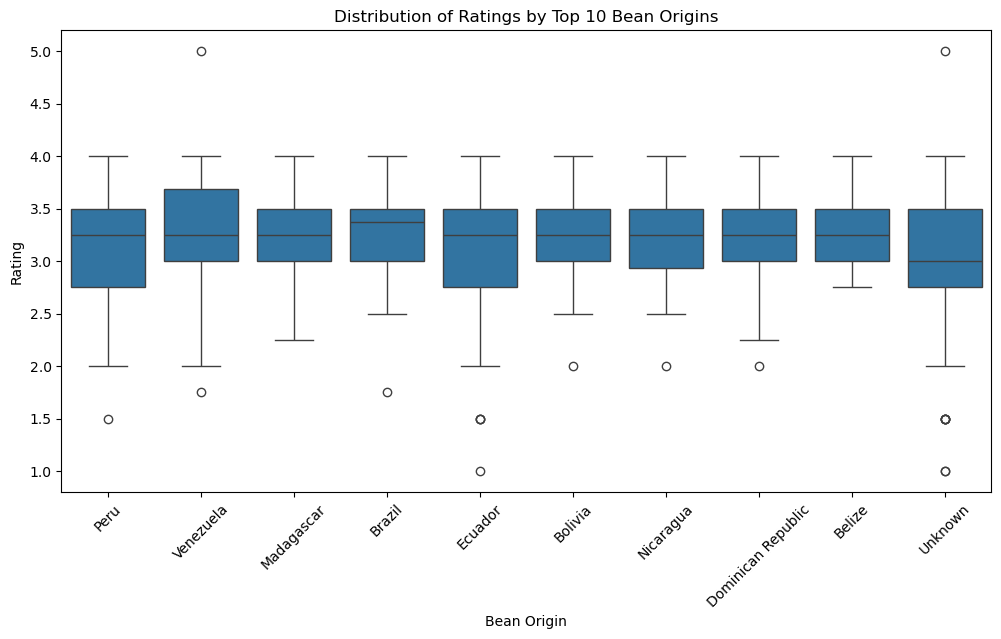

In [54]:
# Identify top 10 most common Bean Origins
top_origins = df_clean['Bean_Origin'].value_counts().nlargest(10).index
3
# Filter the dataset to include only those top origins
filtered_data = df_clean[df_clean['Bean_Origin'].isin(top_origins)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Bean_Origin', y='Rating')
plt.title('Distribution of Ratings by Top 10 Bean Origins')
plt.xticks(rotation=45)
plt.xlabel('Bean Origin')
plt.ylabel('Rating')
plt.savefig(r"C:\Users\beaac\Desktop\Chocolate Bars\04 Analysis\Visualizations\boxplot_top10_bean_origin.png",
            dpi=300, bbox_inches='tight')
plt.show()


This Boxplot compares rating distributions across the 10 most frequent bean origins. Venezuela, Peru and Madagacar show relatively high median ratings. Dominican Republic, Belize and Unknow show more variability.

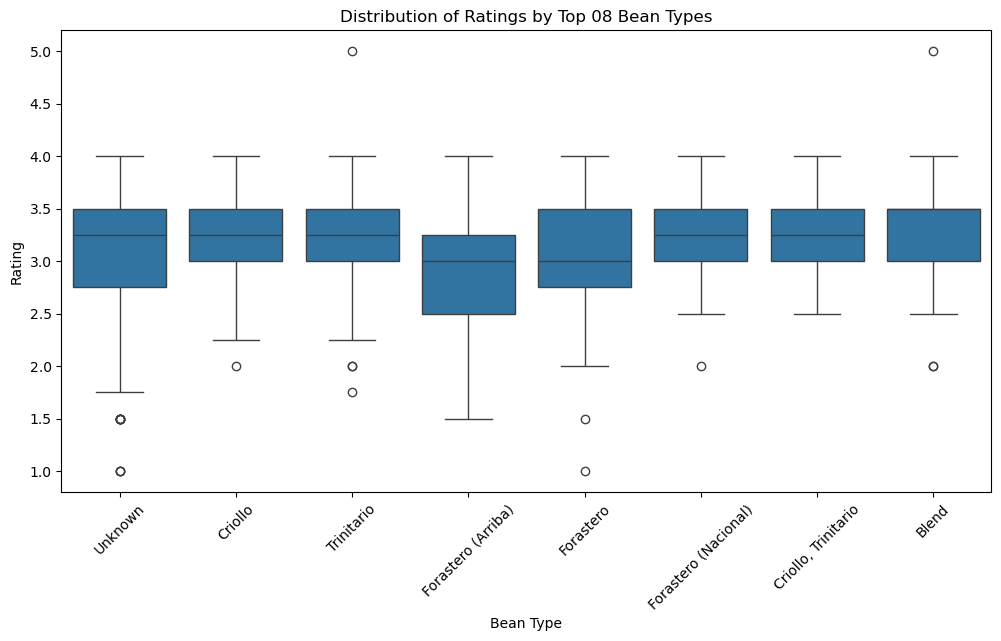

In [57]:
# Identify top 8 most common Bean types
top_bean_1 = df_clean['Bean_Type'].value_counts().nlargest(8).index
3
# Filter the dataset to include only those top origins
filtered_data_1 = df_clean[df_clean['Bean_Type'].isin(top_bean_1)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data_1, x='Bean_Type', y='Rating')
plt.title('Distribution of Ratings by Top 08 Bean Types')
plt.xticks(rotation=45)
plt.xlabel('Bean Type')
plt.ylabel('Rating')
plt.savefig(r"C:\Users\beaac\Desktop\Chocolate Bars\04 Analysis\Visualizations\boxplot_top08_bean_type.png",
            dpi=300, bbox_inches='tight')
plt.show()


6. Question an answer from previous task

 Question 1
-How does cocoa percentage correlate with ratings?
As the cocoa percentage increases, ratings tend to dip slightly.

Question 2
-Do certain cocoa bean varieties receive higher ratings?
Som varieties such as Criollo or Trinitario tend to have higher median ratings and narrower ranges, indicating consistently favorable reviews

Question 3- 
Does country of origin influence chocolate quality perception?
Origins like Vnezuela, Peru, and Madagascar consistently show higher medians and tighter distributions, implying that costumers perceive chocolate from these regions as higher quality. 

7. Hypothesis

1- If the ratngs are lower, then the cocoa percent in the chocolate is high

2- If the bean type is Criollo or Trinitario, then the chocolate will receive a higher rating

3- If the bean is from a country in the top 5 most frequent origins, then the chocolate bar will receive higher ratings.

4- If the chocolate is made in countries with srong reputation for chocolate making (e.g., France, Switzerland, Belgium), Then it will receive higher ratings.